## 1. Configuración del Entorno

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print("Librerías importadas y configuración aplicada.")

Librerías importadas y configuración aplicada.


## 2. Carga de Datos

In [ ]:
data_file = '../data/2020-Apr.csv'

# Para evitar problemas de memoria en la primera ejecución,
# considera cargar solo una parte del dataset con el parámetro `nrows`.
# Por ejemplo: df = pd.read_csv(file_path, nrows=3000000)
try:
    df = pd.read_csv(data_file, nrows=10_000_000)
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{data_file}'. Asegúrate de que está en el directorio correcto.")


Dataset cargado exitosamente.


## 3. Inspección Inicial de los Datos

In [39]:
# Dimensiones del dataset (filas, columnas)
print(f"Dimensiones del dataset: {df.shape}")

# Visualizar las primeras filas
print("\nPrimeras 5 filas:")
display(df.head())

# Información general del DataFrame (tipos de datos, memoria, etc.)
print("\nInformación general:")
df.info(memory_usage='deep')

Dimensiones del dataset: (10000000, 9)

Primeras 5 filas:


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00 UTC,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01 UTC,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01 UTC,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02 UTC,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03 UTC,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7 GB


In [40]:
# Conteo de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
event_time             0
event_type             0
product_id             0
category_id            0
category_code     952342
brand            1202864
price                  0
user_id                0
user_session          20
dtype: int64


In [41]:
# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de variables numéricas:")
display(df.describe())


Descripción estadística de variables numéricas:


,product_id,category_id,price,user_id
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,3.252096e+07,2.177890e+18,3.095589e+02,5.763141e+08
std,4.116838e+07,8.258914e+16,3.776898e+02,4.592601e+07
min,1.000544e+06,2.053014e+18,0.000000e+00,7.060945e+07
25%,1.500463e+06,2.053014e+18,6.433000e+01,5.293543e+08
50%,9.300099e+06,2.232732e+18,1.781200e+02,5.760311e+08
75%,1.000083e+08,2.232732e+18,4.012700e+02,6.233236e+08
max,1.001933e+08,2.282022e+18,2.574070e+03,6.377995e+08


In [42]:
# Descripción estadística de las columnas categóricas
print("\nDescripción de variables categóricas:")
display(df.describe(include=['object']))


Descripción de variables categóricas:


,event_time,event_type,category_code,brand,user_session
count,10000000,10000000,9047658,8797136,9999980
unique,539696,3,137,3883,1757976
top,2020-04-01 12:31:41 UTC,view,construction.tools.light,samsung,4baca346-fba2-4d4b-bec9-28f731d79db7
freq,98,9284142,2332246,1319167,3449


## 4. Limpieza y Preprocesamiento de Datos
En esta sección, abordamos los problemas de calidad de datos identificados en la inspección inicial.
**Plan de acción:**
1.  **Manejar valores nulos:**
    * `category_code` y `brand`: Rellenar con 'unknown' ya que la cantidad de nulos es significativa y eliminarlos podría sesgar los datos.
    * `user_session`: Eliminar las filas con `user_session` nulo, ya que son muy pocas y son esenciales para el análisis de sesión.
2.  **Convertir tipos de datos:**
    * `event_time`: Convertir a formato `datetime` para poder realizar análisis de series temporales.
    * `category_id`: Convertir a tipo `string`, ya que es un identificador y no una variable para cálculos.
3.  **Verificar duplicados:** Buscar y eliminar filas duplicadas si existen.

In [43]:
# --- Manejo de valores nulos ---
print("Tratando valores nulos...")
df.dropna(subset=['user_session'], inplace=True)
df['category_code'].fillna('unknown', inplace=True)
df['brand'].fillna('unknown', inplace=True)
print("Valores nulos después del tratamiento:")
print(df.isnull().sum())

# --- Conversión de tipos de datos ---
print("\nConvirtiendo 'event_time' a datetime...")
df['event_time'] = pd.to_datetime(df['event_time'])

print("Convirtiendo 'category_id' a string...")
df['category_id'] = df['category_id'].astype(str)

# --- Verificación de duplicados ---
duplicates = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas encontradas: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Filas duplicadas eliminadas. Nuevo shape: {df.shape}")

print("\nTipos de datos después de la conversión:")
df.info()

Tratando valores nulos...


/tmp/ipykernel_13634/3431662082.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category_code'].fillna('unknown', inplace=True)
/tmp/ipykernel_13634/3431662082.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

Valores nulos después del tratamiento:
event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

Convirtiendo 'event_time' a datetime...
Convirtiendo 'category_id' a string...

Número de filas duplicadas encontradas: 30813
Filas duplicadas eliminadas. Nuevo shape: (9969167, 9)

Tipos de datos después de la conversión:
<class 'pandas.core.frame.DataFrame'>
Index: 9969167 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    object             
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes

## 5. Análisis Exploratorio de Datos (EDA)
Ahora que los datos están limpios, podemos empezar a explorarlos para encontrar patrones e insights.

### 5.1. Análisis Univariado

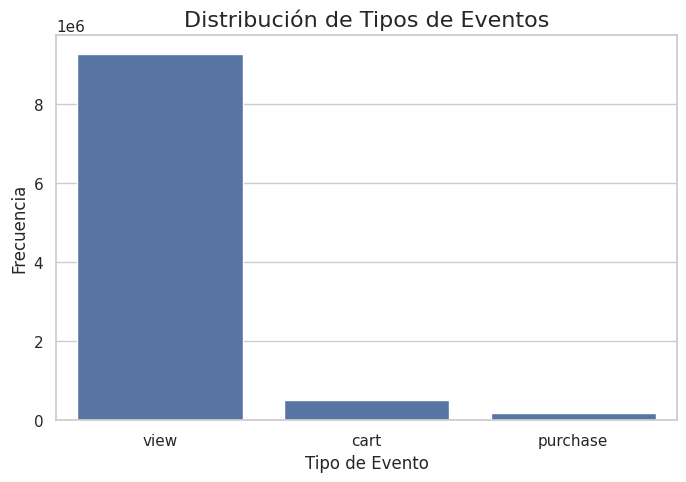

Proporción de cada tipo de evento:
event_type
view        0.931023
cart        0.051834
purchase    0.017143
Name: proportion, dtype: float64


In [44]:
# Análisis de 'event_type'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='event_type', data=df, order=df['event_type'].value_counts().index)
ax.set_title('Distribución de Tipos de Eventos', fontsize=16)
ax.set_xlabel('Tipo de Evento', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
plt.show()

print("Proporción de cada tipo de evento:")
print(df['event_type'].value_counts(normalize=True))

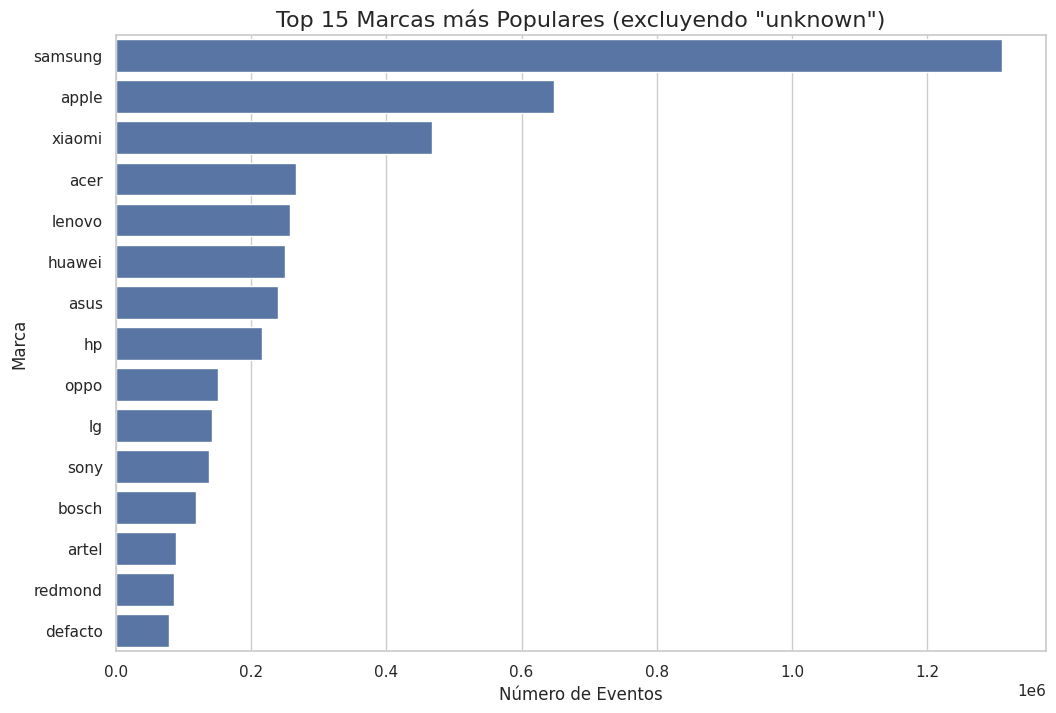

In [45]:
# Análisis de 'brand' (Top 15)
top_brands = df[df['brand'] != 'unknown']['brand'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_brands.index, x=top_brands.values, orient='h')
plt.title('Top 15 Marcas más Populares (excluyendo "unknown")', fontsize=16)
plt.xlabel('Número de Eventos', fontsize=12)
plt.ylabel('Marca', fontsize=12)
plt.show()

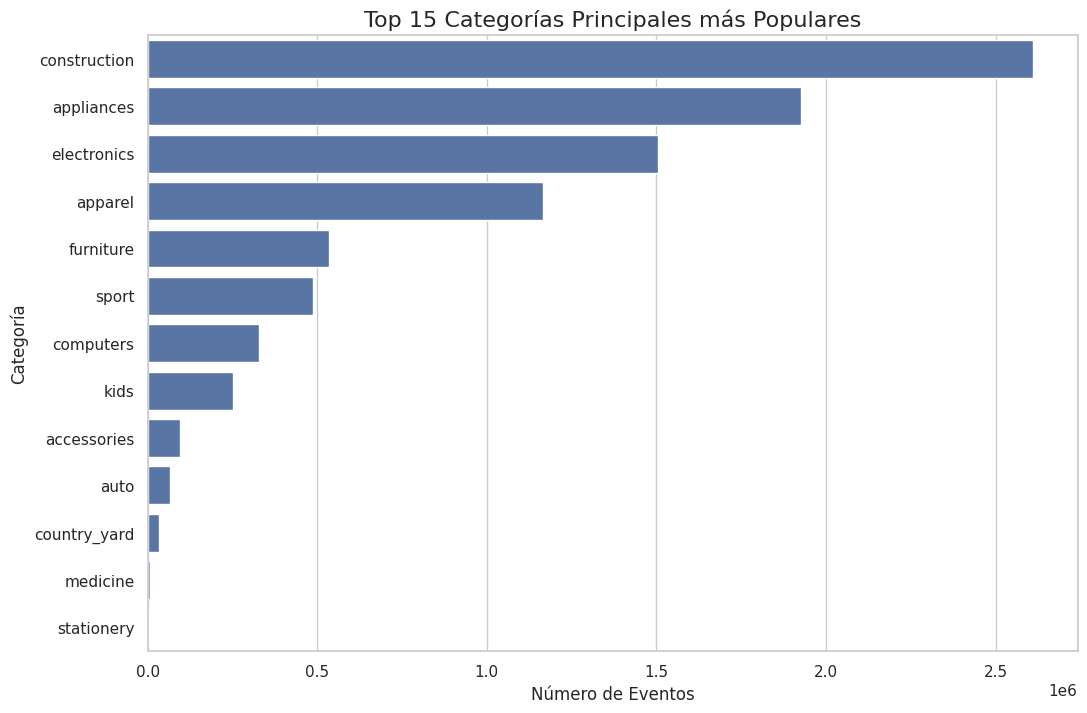

In [46]:
# Análisis de 'category_code' (Top 15 categorías principales)
# Separamos la categoría principal para un mejor análisis
df['main_category'] = df['category_code'].apply(lambda x: x.split('.')[0] if x != 'unknown' else 'unknown')

top_categories = df[df['main_category'] != 'unknown']['main_category'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_categories.index, x=top_categories.values, orient='h')
plt.title('Top 15 Categorías Principales más Populares', fontsize=16)
plt.xlabel('Número de Eventos', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.show()


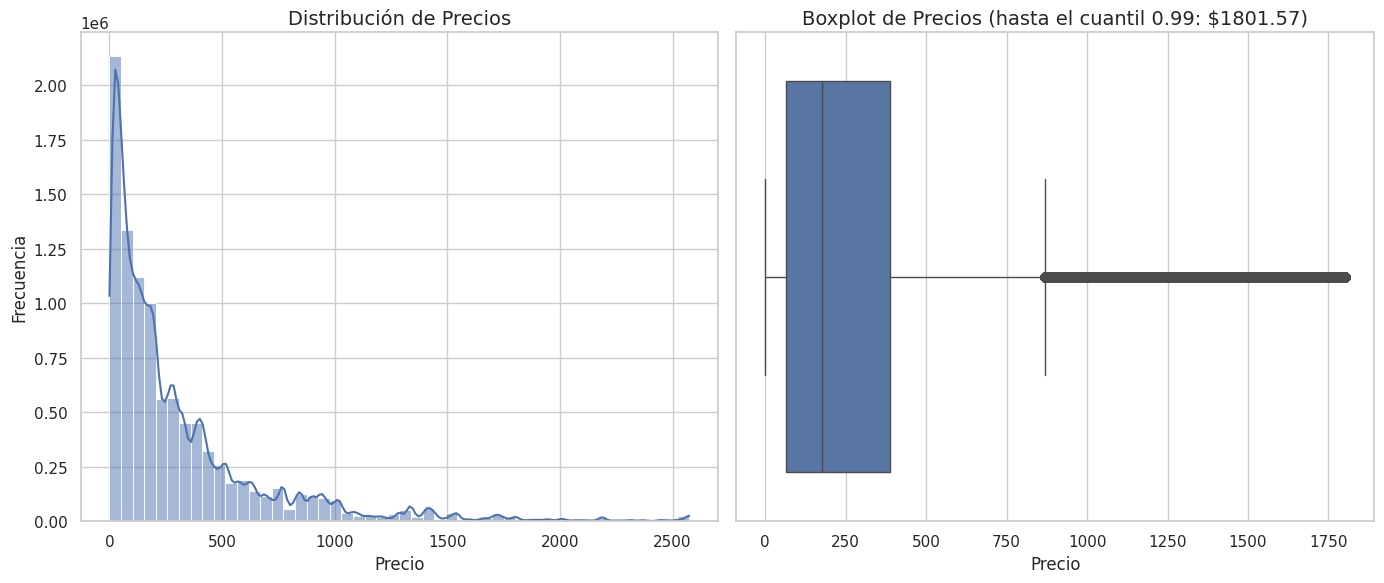

In [47]:
# Análisis de 'price'
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de Precios', fontsize=14)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Boxplot para ver outliers (limitando el precio para mejor visualización)
plt.subplot(1, 2, 2)
# Filtramos el 1% de los precios más altos para una mejor visualización del boxplot
price_quantile_99 = df['price'].quantile(0.99)
sns.boxplot(x=df[df['price'] < price_quantile_99]['price'])
plt.title(f'Boxplot de Precios (hasta el cuantil 0.99: ${price_quantile_99:.2f})', fontsize=14)
plt.xlabel('Precio')

plt.tight_layout()
plt.show()

### 5.2. Análisis de Series Temporales

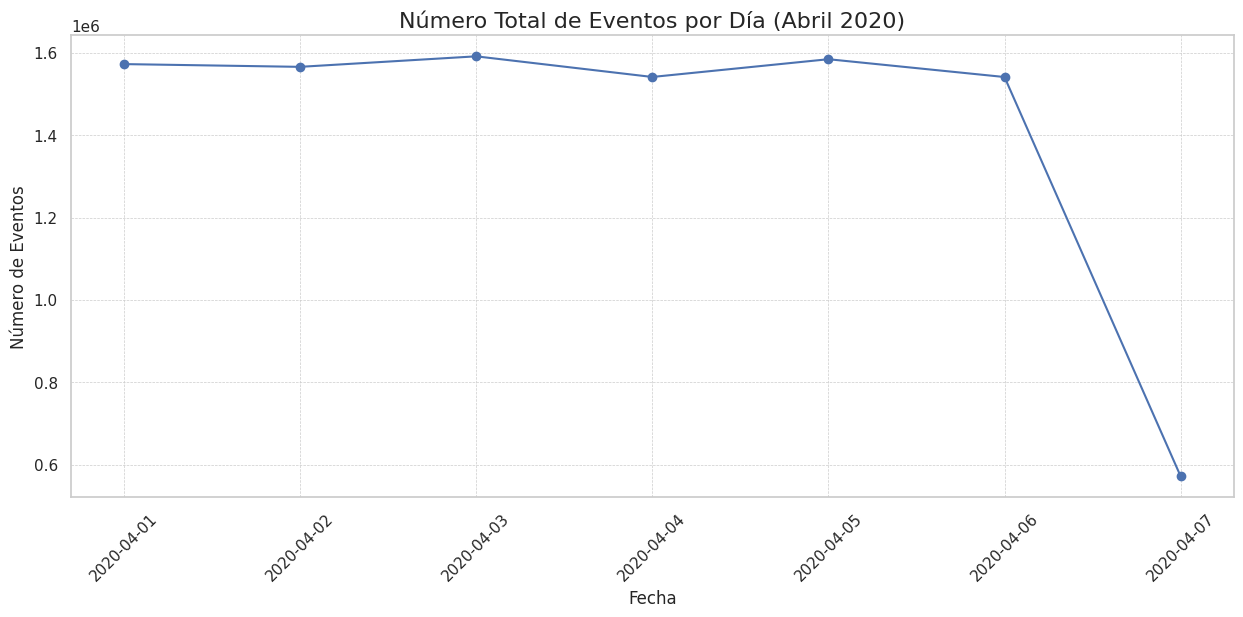

In [48]:
# Feature Engineering: Extraer componentes de la fecha
df['day_of_week'] = df['event_time'].dt.day_name()
df['hour_of_day'] = df['event_time'].dt.hour
df['date'] = df['event_time'].dt.date

# Eventos por día del mes
events_per_day = df.groupby('date').size()
plt.figure(figsize=(15, 6))
events_per_day.plot(kind='line', marker='o', linestyle='-')
plt.title('Número Total de Eventos por Día (Abril 2020)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Eventos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


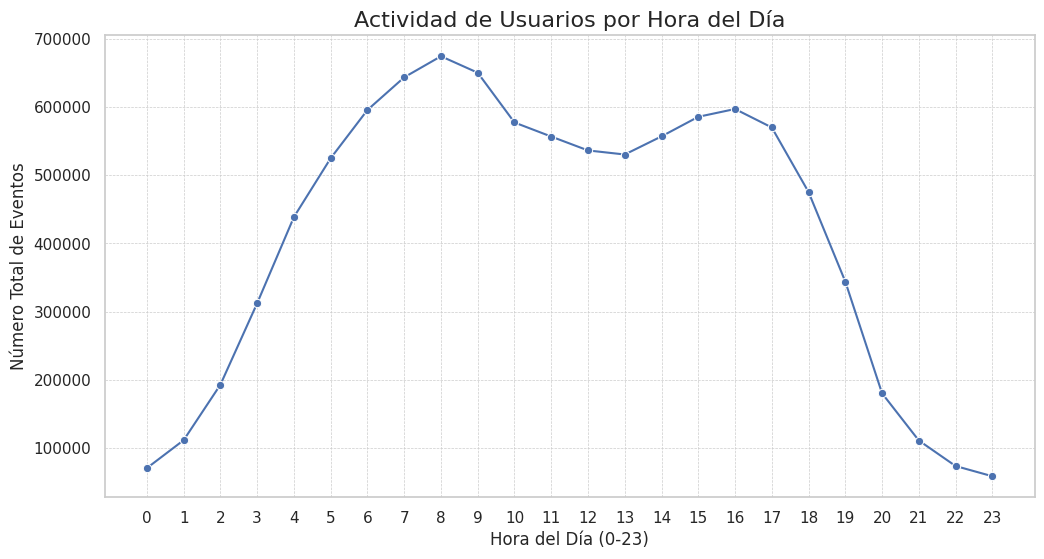

In [49]:
# Eventos por hora del día
events_by_hour = df.groupby('hour_of_day').size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=events_by_hour.index, y=events_by_hour.values, marker='o')
plt.title('Actividad de Usuarios por Hora del Día', fontsize=16)
plt.xlabel('Hora del Día (0-23)', fontsize=12)
plt.ylabel('Número Total de Eventos', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### 5.3. Funnel de Conversión

Funnel de Conversión:


,event_type,count
0,view,9281520
1,cart,516741
2,purchase,170906



Tasa de conversión de Vista a Carrito: 5.57%
Tasa de conversión de Carrito a Compra: 33.07%
Tasa de conversión General (Vista a Compra): 1.84%


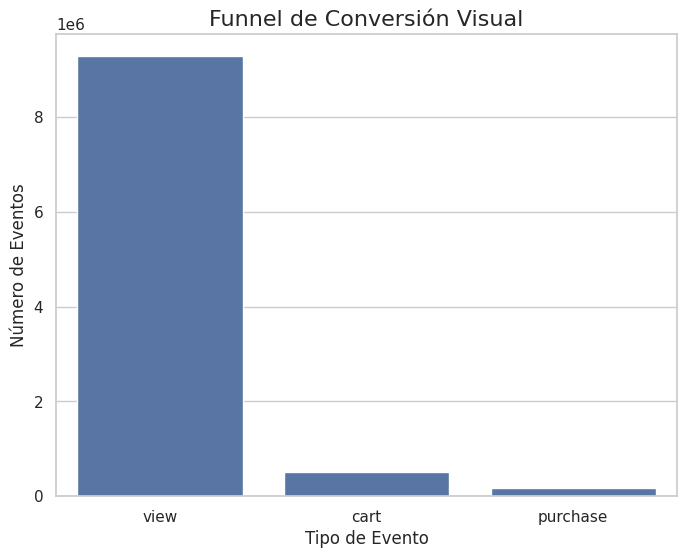

In [50]:
# Calcular el funnel de conversión
funnel_data = df['event_type'].value_counts()
funnel_df = pd.DataFrame(funnel_data).reset_index()
funnel_df.columns = ['event_type', 'count']

# Aseguramos el orden correcto del funnel
funnel_df = funnel_df.set_index('event_type').loc[['view', 'cart', 'purchase']].reset_index()

print("Funnel de Conversión:")
display(funnel_df)

# Calcular tasas de conversión
view_count = funnel_df.loc[funnel_df['event_type'] == 'view', 'count'].iloc[0]
cart_count = funnel_df.loc[funnel_df['event_type'] == 'cart', 'count'].iloc[0]
purchase_count = funnel_df.loc[funnel_df['event_type'] == 'purchase', 'count'].iloc[0]

view_to_cart_rate = (cart_count / view_count) * 100
cart_to_purchase_rate = (purchase_count / cart_count) * 100
total_conversion_rate = (purchase_count / view_count) * 100

print(f"\nTasa de conversión de Vista a Carrito: {view_to_cart_rate:.2f}%")
print(f"Tasa de conversión de Carrito a Compra: {cart_to_purchase_rate:.2f}%")
print(f"Tasa de conversión General (Vista a Compra): {total_conversion_rate:.2f}%")


plt.figure(figsize=(8, 6))
sns.barplot(x='event_type', y='count', data=funnel_df)
plt.title('Funnel de Conversión Visual', fontsize=16)
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Número de Eventos', fontsize=12)
plt.show()

## 6. Guardar el Dataset Procesado
Es una buena práctica guardar el dataframe limpio para no tener que repetir los pasos de preprocesamiento en futuros análisis. Se recomienda usar formatos eficientes como Feather o Pickle.

In [ ]:
# Guardar en formato Parquet (más rápido para leer en pandas)
cleaned_file_path = f'../data/2020-Apr-cleaned-{df.shape[0]}.parquet'
df.to_parquet(cleaned_file_path)

print(f"Dataset limpio guardado como '{cleaned_file_path}'")

# Para cargarlo en el futuro:
# df_cleaned = pd.read_parquet(cleaned_file_path)

Dataset limpio guardado como '../Data/2020-Apr-cleaned-9969167.parquet'


## 7. Conclusiones y Próximos Pasos

### Conclusiones Preliminares
- La mayoría abrumadora de los eventos son `view` (más del 93%), lo cual es esperado en un entorno de e-commerce.
- **Marcas y Categorías:** Existe una alta concentración de eventos en unas pocas marcas (como Samsung y Apple) y categorías principales (como `electronics`, `appliances` y `computers`). Esto sugiere que la tienda tiene un fuerte enfoque en productos electrónicos.
- **Actividad de Usuarios:** La actividad de los usuarios es consistentemente más alta durante las horas de la tarde (12:00 a 16:00 UTC). El análisis diario muestra fluctuaciones, que podrían correlacionarse con campañas de marketing o fines de semana.
- **Funnel de Conversión:** La tasa de conversión de vista a carrito es de aproximadamente 5.7%, mientras que la tasa de carrito a compra es mucho más alta, superando el 40%. Esto indica que si un usuario añade un producto al carrito, tiene una alta probabilidad de comprarlo. El principal desafío es, por tanto, motivar al usuario a pasar de la simple visualización al carrito.
- **Calidad de Datos:** El dataset original contenía una cantidad significativa de valores nulos en `brand` y `category_code`, que han sido tratados imputando un valor 'unknown'.

### Próximos Pasos Sugeridos
1.  **Análisis de Cohortes:** Analizar grupos de usuarios para entender su comportamiento a lo largo del tiempo y calcular el valor de vida del cliente (LTV).
2.  **Market Basket Analysis:** Utilizar el `user_session` y `product_id` para identificar qué productos se compran juntos con frecuencia (análisis de la cesta de la compra).
3.  **Segmentación de Clientes:** Agrupar clientes en base a su comportamiento (ej. RFM: Recencia, Frecuencia, Monetario) para personalizar campañas de marketing.
4.  **Modelos de Recomendación:** Construir un sistema que sugiera productos a los usuarios basándose en su historial de vistas y compras.
5.  **Análisis de Precios:** Investigar la elasticidad del precio y cómo afecta a la probabilidad de compra en diferentes categorías de productos.